In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
amzn = pd.read_csv("Amazon_data.csv",parse_dates=['Date'],index_col=['Date'])

In [4]:
amzn.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-16,$3573.63,4043706,$3633.31,$3646.0599,$3570.455
2021-07-15,$3631.2,3185292,$3694.2,$3695.4,$3620.92
2021-07-14,$3681.68,3296568,$3708.85,$3717.66,$3660.8266
2021-07-13,$3677.36,3845917,$3702.1,$3773.0782,$3671.32
2021-07-12,$3718.55,2571635,$3744,$3757.2899,$3696.7929


In [5]:
amzn.sort_index(inplace=True)
#removing the '$' sign
for i in amzn[['Close/Last','Open','High','Low']]:
    amzn[i] =amzn[i].map(lambda x:x.replace('$',"")).astype(float)
# rounding off to two decimal points
amzn = round(amzn,2)

In [6]:
amzn.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-07-18,736.07,2952099,735.49,741.60,728.72
2016-07-19,739.95,2210751,732.50,743.33,732.31
2016-07-20,745.72,2192779,744.00,746.25,740.70
2016-07-21,744.43,2315367,747.50,749.36,742.79
2016-07-22,744.86,2259345,747.79,751.28,743.53


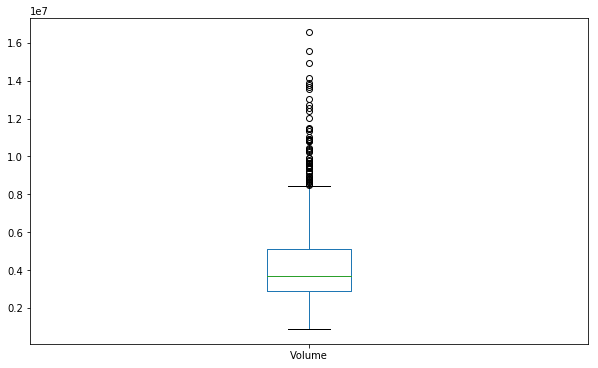

In [7]:
amzn['Volume'].plot(kind='box',figsize=(10,6))

In [8]:
#to check the correlation
amzn.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.061855,0.999276,0.999654,0.999671
Volume,0.061855,1.000000,0.064036,0.072706,0.051556
Open,0.999276,0.064036,1.000000,0.999700,0.999599
High,0.999654,0.072706,0.999700,1.000000,0.999518
Low,0.999671,0.051556,0.999599,0.999518,1.000000


### Here we can see that there is very less correlation with volume and also there are outliers so we can drop the 'Volume' column

In [9]:
amzn_cleaned=amzn.drop(columns=['Volume'])

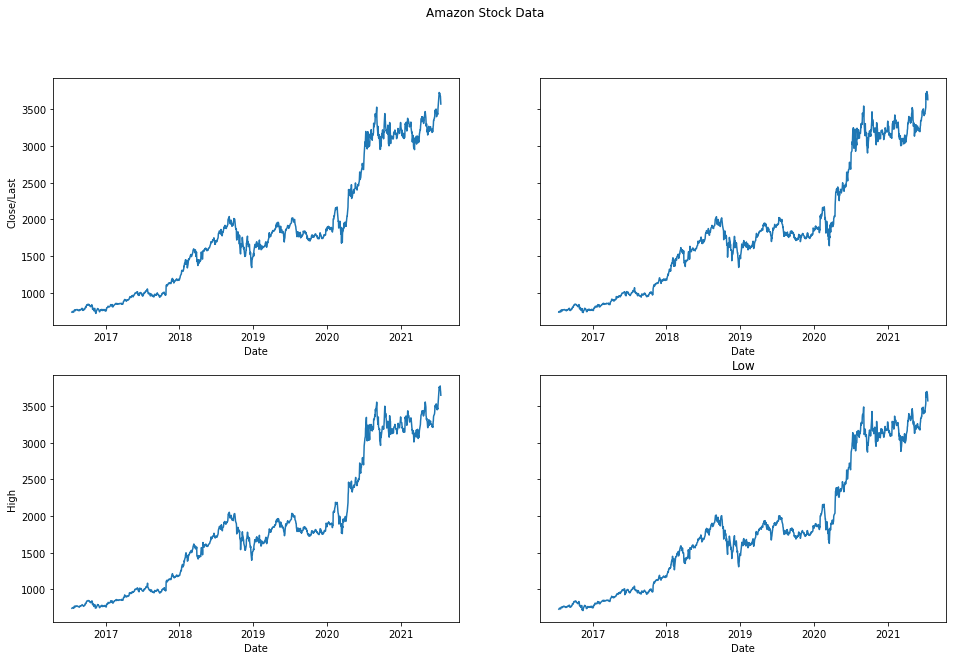

In [10]:
fig, axes = plt.subplots(2, 2,figsize=(16,10), sharey=True)
fig.suptitle('Amazon Stock Data')


sns.lineplot(ax=axes[0,0], x=amzn_cleaned.index, y=amzn_cleaned['Close/Last'])
plt.title('Close/last')

sns.lineplot(ax=axes[0,1], x=amzn_cleaned.index, y=amzn_cleaned['Open'])
plt.title('Open')

sns.lineplot(ax=axes[1,0], x=amzn_cleaned.index, y=amzn_cleaned['High'])
plt.title('High')

sns.lineplot(ax=axes[1,1], x=amzn_cleaned.index, y=amzn_cleaned['Low'])
plt.title('Low')

plt.show()

## Modeling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
X1= amzn_cleaned.iloc[:,1:4]
y=amzn['Close/Last']
X=scaler.fit_transform(X1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((881, 3), (378, 3), (881,), (378,))

## Fitting Linear regession Model

In [15]:
lnr= LinearRegression()
model=lnr.fit(X_train,y_train)

In [16]:
y_pred=model.predict(X_test)

In [17]:
r2_score(y_test,y_pred)

0.9997322684183341

In [18]:
r2_score(y_train,model.predict(X_train))

0.9997362508520083

In [19]:
sqrt(mean_squared_error(y_test,y_pred))

13.688391124491822

In [20]:
sqrt(mean_squared_error(y_train,model.predict(X_train)))

13.64202948258606

### Manually dividing into train and test data

In [21]:
#using 30% of data for validaton
train_data = amzn_cleaned[:881]
valid_data = amzn_cleaned[881:]

In [22]:
xtrain = train_data.drop('Close/Last', axis=1)
ytrain = train_data['Close/Last']
xtest = valid_data.drop('Close/Last', axis=1)
ytest = valid_data['Close/Last']

In [25]:
#fitting the regression model
new_model=lnr.fit(xtrain,ytrain)

In [26]:
ypred=new_model.predict(xtest)

In [27]:
r2_score(ytest,ypred)

0.9981915886862777

In [28]:
r2_score(ytrain,new_model.predict(xtrain))

0.9996396335813047

In [29]:
sqrt(mean_squared_error(ytest,ypred))

21.88482223173948

In [30]:
sqrt(mean_squared_error(ytrain,model.predict(xtrain)))

8.146884906335284

In [31]:
valid_data['Predictions']=0
valid_data['Predictions']=ypred

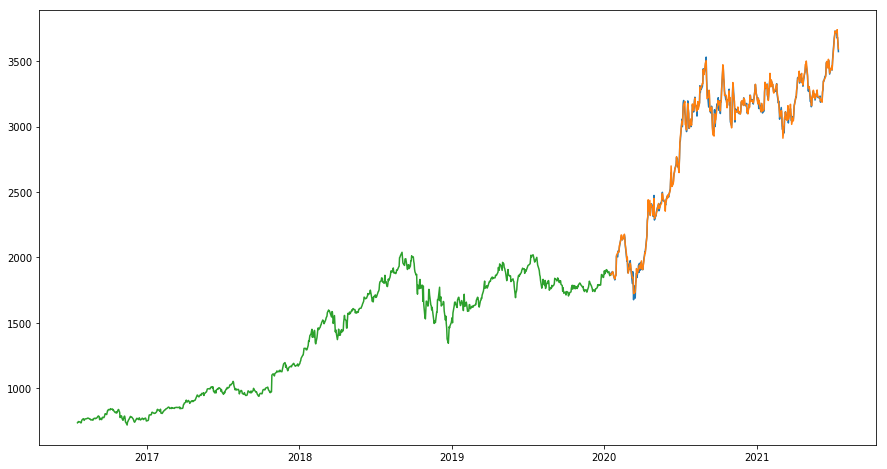

In [33]:
fig=plt.figure(figsize=(15,8))
plt.plot(valid_data[['Close/Last', 'Predictions']])
#plt.plot(valid_data['Close/Last'])
#plt.plot(valid_data['Predictions'])
plt.plot(train_data['Close/Last'],label="train_data_close")

plt.show()

# Using LSTM model

In [34]:
x_new=amzn_cleaned.iloc[:,1:4]
x_new

,Open,High,Low
Date,,,
2016-07-18,735.49,741.60,728.72
2016-07-19,732.50,743.33,732.31
2016-07-20,744.00,746.25,740.70
2016-07-21,747.50,749.36,742.79
2016-07-22,747.79,751.28,743.53
...,...,...,...
2021-07-12,3744.00,3757.29,3696.79
2021-07-13,3702.10,3773.08,3671.32
2021-07-14,3708.85,3717.66,3660.83


In [35]:
y_new=amzn_cleaned["Close/Last"]

In [36]:
from sklearn.preprocessing import MinMaxScaler

# scaling the feature dataset
scaler_x = MinMaxScaler (feature_range=(0, 1))
x1 = np.array(x_new).reshape((len(x_new) ,3))
x1 = scaler_x.fit_transform(x1)

# scaling the target variable
scaler_y =MinMaxScaler (feature_range=(0, 1))
y1 = np.array (y_new).reshape ((len( y_new), 1))
y1 = scaler_y.fit_transform (y1)

# displaying the scaled feature dataset and the target variable
x1, y1

(array([[1.82149967e-03, 2.17668050e-04, 6.23432629e-03],
        [8.29462508e-04, 7.88222180e-04, 7.43632583e-03],
        [4.64499005e-03, 1.75123840e-03, 1.02454557e-02],
        ...,
        [9.88337757e-01, 9.81722480e-01, 9.87959915e-01],
        [9.83477107e-01, 9.74381130e-01, 9.74597297e-01],
        [9.63274718e-01, 9.58108794e-01, 9.57702339e-01]]),
 array([[0.00564345],
        [0.00693149],
        [0.00884694],
        ...,
        [0.98349124],
        [0.9667335 ],
        [0.94762211]]))

In [37]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(y1)-1))

# using 80% of data for training
train_end = int(data_to_use*0.7)
total_data = len(y1)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 880
Number of records in Test Data: 379


In [38]:
# preparing training and test dataset
X_train_new = x1[0 : train_end,]
X_test_new = x1[train_end+1 : len(x1),]    
y_train_new = y1[0 : train_end] 
y_test_new = y1[train_end+1 : len(y1)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (881, 3) and y: (881,)
Number of rows and columns in the Test set X: (378, 3) and y: (378,)


In [39]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((880, 3), (378, 3), (880, 1), (378, 1))

In [40]:
# converting into 3d for lstm
X_train_new =X_train_new.reshape(X_train_new.shape[0],X_train.shape[1] , 1)
X_test_new = X_test_new.reshape(X_test_new.shape[0],X_test_new.shape[1] , 1)

In [41]:
X_train_new.shape

(880, 3, 1)

In [42]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:

model.fit(X_train_new,y_train_new,validation_data=(X_test_new,y_test_new),epochs=100,batch_size=64,verbose=1)

Train on 880 samples, validate on 378 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
880/880 [==============================] - 8s 9ms/sample - loss: 0.0447 - val_loss: 0.2830
Epoch 2/100
880/880 [==============================] - 0s 511us/sample - loss: 0.0168 - val_loss: 0.1341
Epoch 3/100
880/880 [==============================] - 0s 443us/sample - loss: 0.0113 - val_loss: 0.1151
Epoch 4/100
880/880 [==============================] - 0s 473us/sample - loss: 0.0056 - val_loss: 0.0073
Epoch 5/100
880/880 [==============================] - 0s 494us/sample - loss: 7.1528e-04 - val_loss: 0.0528
Epoch 6/100
880/880 [==============================] - 0s 459us/sample - loss: 3.4475e-04 - val_loss: 0.0203
Epoch 7/100
880/880 [==============================] - 0s 548us/sample - loss: 8.7780e-05 - val_loss: 0.0096
Epoch 8/100
880/880 [==============================] - 0s 477us/sample - loss: 7.1857e-05 - val_loss: 0.0160
Epoch 

Epoch 71/100
880/880 [==============================] - 1s 597us/sample - loss: 3.6942e-05 - val_loss: 5.5795e-04
Epoch 72/100
880/880 [==============================] - 0s 550us/sample - loss: 4.1061e-05 - val_loss: 9.7005e-04
Epoch 73/100
880/880 [==============================] - 1s 605us/sample - loss: 3.8492e-05 - val_loss: 0.0013
Epoch 74/100
880/880 [==============================] - 0s 532us/sample - loss: 3.8489e-05 - val_loss: 6.3354e-04
Epoch 75/100
880/880 [==============================] - 0s 566us/sample - loss: 3.6023e-05 - val_loss: 6.9239e-04
Epoch 76/100
880/880 [==============================] - 1s 581us/sample - loss: 3.6187e-05 - val_loss: 7.2921e-04
Epoch 77/100
880/880 [==============================] - 1s 601us/sample - loss: 3.8946e-05 - val_loss: 8.0006e-04
Epoch 78/100
880/880 [==============================] - 0s 495us/sample - loss: 3.3187e-05 - val_loss: 7.2971e-04
Epoch 79/100
880/880 [==============================] - 0s 472us/sample - loss: 3.4963e-05 -

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train_new)
test_predict=model.predict(X_test_new)

In [47]:
##Transformback to original form
train_predict=scaler_y.inverse_transform(train_predict)
test_predict=scaler_y.inverse_transform(test_predict)

In [48]:
import math
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
math.sqrt(mean_squared_error(y_train_new,train_predict))

1445.5312622165886

In [49]:
### Test Data RMSE_
math.sqrt(mean_squared_error(y_test_new,test_predict))

2894.4467804075416

In [50]:
r2_score(y_test_new,model.predict(X_test_new))

0.9754177867396604

In [51]:

test_predict[0:5]

array([[1879.0822],
       [1880.1367],
       [1870.6353],
       [1893.6301],
       [1882.3594]], dtype=float32)

In [52]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train_new, y_train_new, batch_size = 1)

# calculating the test mean-squared-error_
test_loss = model.evaluate(X_test_new, y_test_new, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

378/378 [==============================] - 2s 4ms/sample - loss: 7.1747e-04
Train Loss = 0.0
Test Loss = 0.0007


In [53]:
# unscaling the test feature dataset, x_test
X_test_new = scaler_x.inverse_transform(np.array(X_test_new).reshape((len(X_test_new), 3)))

# unscaling the test y dataset, y_test
y_train_new = scaler_y.inverse_transform(np.array(y_train_new).reshape((len(y_train_new), 1)))
y_test_new = scaler_y.inverse_transform(np.array(y_test_new).reshape((len(y_test_new), 1)))

In [55]:
y_test_new[0:10]

array([[1877.94],
       [1864.72],
       [1892.  ],
       [1887.46],
       [1884.58],
       [1861.64],
       [1828.34],
       [1853.25],
       [1858.  ],
       [1870.68]])

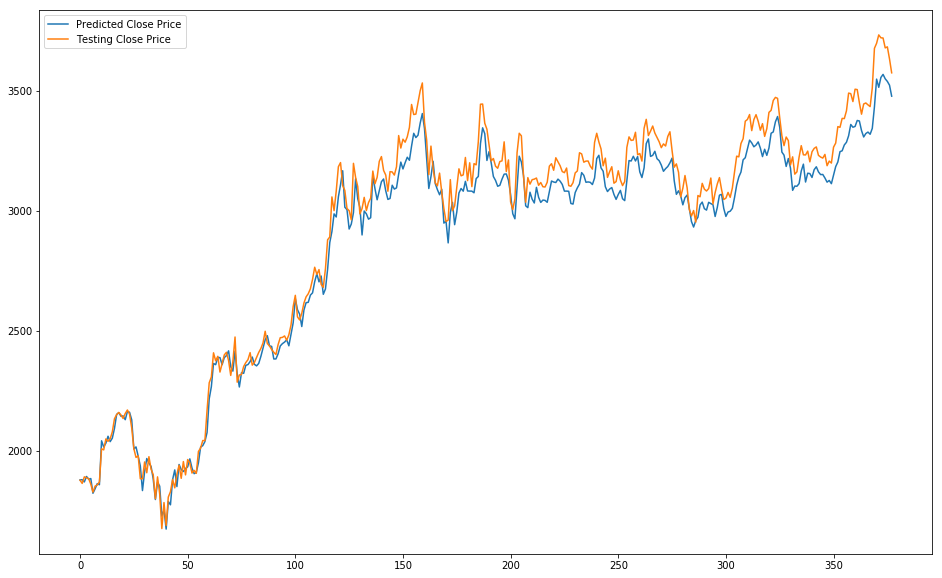

In [57]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(test_predict, label="Predicted Close Price")
plt.plot([row[0] for row in y_test_new], label="Testing Close Price")
plt.legend()
plt.show()